# Explorative Datenanalyse – Brazilian E-Commerce

## Ziel
Erste Sichtung und Verständnis des Olist-Bestelldatensatzes:
- Struktur der Daten
- Anzahl der Beobachtungen
- Datentypen
- erste Auffälligkeiten

## Datensatz
Quelle: Kaggle – Brazilian E-Commerce Public Dataset by Olist

In [1]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

In [2]:
data_path = "C:/Users/misos/Documents/projects/olist-data-cleaning-portfolio/data/raw/olist_orders_dataset.csv"

df_orders = pd.read_csv(data_path)

In [3]:
df_orders.shape

(99441, 8)

In [4]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [5]:
df_orders.shape


(99441, 8)

Fehlende Werte 

In [6]:
missing = df_orders.isna().sum().sort_values(ascending=False)
missing

order_delivered_customer_date    2965
order_delivered_carrier_date     1783
order_approved_at                 160
order_id                            0
order_purchase_timestamp            0
order_status                        0
customer_id                         0
order_estimated_delivery_date       0
dtype: int64

Zeitstempel analysieren

In [7]:
date_cols = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_customer_date"
]

for col in date_cols:
    df_orders[col] = pd.to_datetime(df_orders[col], errors="coerce")

In [8]:
df_orders["delivery_time_days"] = (
    df_orders["order_delivered_customer_date"]
    - df_orders["order_purchase_timestamp"]
).dt.days


deskriptive Statistik

In [9]:
df_orders["delivery_time_days"].describe()

count    96476.000000
mean        12.094086
std          9.551746
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: delivery_time_days, dtype: float64

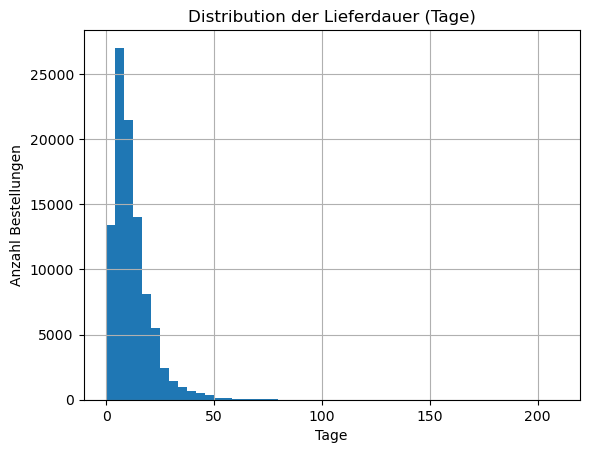

In [10]:
import matplotlib.pyplot as plt

df_orders["delivery_time_days"].dropna().hist(bins=50)
plt.title("Distribution der Lieferdauer (Tage)")
plt.xlabel("Tage")
plt.ylabel("Anzahl Bestellungen")
plt.show()


### Analytik

Haben verspätete Lieferungen Einfluss auf den Bestellstatus?

In [11]:
df_orders.groupby("order_status")["delivery_time_days"].mean()

order_status
approved             NaN
canceled       19.833333
created              NaN
delivered      12.093604
invoiced             NaN
processing           NaN
shipped              NaN
unavailable          NaN
Name: delivery_time_days, dtype: float64

## Erste Erkenntnisse

- Ein signifikanter Anteil der Bestellungen weist fehlende Lieferdaten auf.
- Die durchschnittliche Lieferzeit beträgt X Tage.
- Es existieren Ausreißer mit extrem langen Lieferzeiten.
- Bestellungen mit Status „canceled“ zeigen andere Muster als „delivered“.

## Nächste Schritte
- Datenbereinigung (Ausreißer, fehlende Werte)
- Verbindung mit weiteren Tabellen (Customers, Payments)
- Vertiefende Analyse auf Kunden- oder Regionsebene


In [12]:
orders = pd.read_csv("C:/Users/misos/Documents/projects/olist-data-cleaning-portfolio/data/raw/olist_orders_dataset.csv")
customers = pd.read_csv("C:/Users/misos/Documents/projects/olist-data-cleaning-portfolio/data/raw/olist_customers_dataset.csv")
items = pd.read_csv("C:/Users/misos/Documents/projects/olist-data-cleaning-portfolio/data/raw/olist_order_items_dataset.csv")
payments = pd.read_csv("C:/Users/misos/Documents/projects/olist-data-cleaning-portfolio/data/raw/olist_order_payments_dataset.csv")

In [13]:
orders.iloc[[0, -1]]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00


In [14]:
orders.shape

(99441, 8)

In [15]:
customers.iloc[[0, -1]]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP


In [16]:
items.iloc[[0, -1]]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.0,12.79


In [17]:
payments.iloc[[0, -1]]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
103885,28bbae6599b09d39ca406b747b6632b1,1,boleto,1,191.58


## Datenmodell (vereinfachtes Star Schema)

- orders ist die zentrale Faktentabelle
- customers liefert Kundenattribute
- items und payments enthalten transaktionale Details

In [18]:
orders.duplicated().sum()
customers.duplicated().sum()
items.duplicated().sum()
payments.duplicated().sum()

np.int64(0)

In [19]:
print(len(orders))
print(len(customers))
print(len(items))

99441
99441
112650


In [20]:
orders.isna().sum()
customers.isna().sum()


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [21]:
orders_customers = orders.merge(
    customers,
    on="customer_id",
    how="left"
)
orders_customers.iloc[[0, -1]]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00,60350aa974b26ff12caad89e55993bd6,83750,lapa,PR


In [22]:
items_agg = (
    items
    .groupby("order_id")
    .agg(
        total_items=("order_item_id", "count"),
        total_price=("price", "sum"),
        total_freight=("freight_value", "sum")
    )
    .reset_index()
)
items_agg.iloc[[0, -1]]

,order_id,total_items,total_price,total_freight
0,00010242fe8c5a6d1ba2dd792cb16214,1,58.9,13.29
98665,fffe41c64501cc87c801fd61db3f6244,1,43.0,12.79


In [23]:
payments_agg = (
    payments
    .groupby("order_id")
    .agg(
        payment_value=("payment_value", "sum"),
        payment_count=("payment_sequential", "max")
    )
    .reset_index()
)
payments_agg.iloc[[0, -1]]

,order_id,payment_value,payment_count
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,1
99439,fffe41c64501cc87c801fd61db3f6244,55.79,1


In [24]:
df_final = (
    orders_customers
    .merge(items_agg, on="order_id", how="left")
    .merge(payments_agg, on="order_id", how="left")
)
df_final.iloc[[0, -1]]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_items,total_price,total_freight,payment_value,payment_count
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,29.99,8.72,38.71,3.0
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00,60350aa974b26ff12caad89e55993bd6,83750,lapa,PR,1.0,68.50,18.36,86.86,1.0


In [25]:
df_final.isna().sum().sort_values(ascending=False)

order_delivered_customer_date    2965
order_delivered_carrier_date     1783
total_freight                     775
total_price                       775
total_items                       775
order_approved_at                 160
payment_value                       1
payment_count                       1
order_id                            0
customer_unique_id                  0
order_estimated_delivery_date       0
order_status                        0
order_purchase_timestamp            0
customer_id                         0
customer_state                      0
customer_zip_code_prefix            0
customer_city                       0
dtype: int64

## Löschen oder Zeilen entfernen?

### Wenn keine Order Items existieren, dann ist:

- Anzahl Items = 0, Preis = 0, Versand = 0

### Hier:

- items_agg wird LEFT-joined

- Wenn keine Items existieren, entstehen NaN

### Semantische Schlussfolgerung: keine Positionen

- 0 ist fachlich korrekt

- „Eine Bestellung ohne Items erzeugt keinen Umsatz.“

In [26]:
df_final["total_price"] = df_final["total_price"].fillna(0)
df_final["total_freight"] = df_final["total_freight"].fillna(0)

In [27]:
df_final["order_value"] = (
    df_final["total_price"] + df_final["total_freight"]
)
df_final.iloc[[0, -1]]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_items,total_price,total_freight,payment_value,payment_count,order_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,29.99,8.72,38.71,3.0,38.71
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00,60350aa974b26ff12caad89e55993bd6,83750,lapa,PR,1.0,68.50,18.36,86.86,1.0,86.86


## Ergebnis von Schritt 3

- Vier Rohdatenquellen wurden integriert
- Aggregationen erfolgten vor Joins zur Vermeidung von Datenexplosion
- Es entstand ein analysefähiges Faktendataset auf Bestellebene

## Einsatz im Unternehmen
Dieses Dataset eignet sich für:
- Umsatzanalysen
- Lieferzeit-Analysen
- Kundensegmentierung
- Dashboarding (z. B. Power BI)


In [28]:
customers.to_csv(
    "../data/processed/customers.csv",
    index=False
)

In [29]:
orders.to_csv(
    "../data/processed/orders.csv",
    index=False
)

In [30]:
items.to_csv(
    "../data/processed/order_items.csv",
    index=False
)

In [31]:
items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [32]:
items.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')